#**Disease Diagnosis Model**
#*Akshay Bhala*
#04/26/2020


## Introduction: 
The Goal is to build a disease diagnosis model to predict whether or not a patient has certain unspecified disease or not for a given binary classification problem. Will be using Logistic Regression Classification Model , Decision Tree and Ann Models.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV


#Section 1: Data preparation

In [0]:
df = pd.read_csv('Disease Prediction Training.csv')

In [5]:
df.isnull().sum()

Age                    0
Gender                 0
Height                 0
Weight                 0
High Blood Pressure    0
Low Blood Pressure     0
Cholesterol            0
Glucose                0
Smoke                  0
Alcohol                0
Exercise               0
Disease                0
dtype: int64

##Analysis: 
From the above summary we can see that the data set does not contain Null Values.

In [6]:
print("shape:",df.shape)
df = df.drop_duplicates()
print("shape after removing duplicates",df.shape)

shape: (49000, 12)
shape after removing duplicates (47248, 12)


##Analysis: 
There were 1752 duplicate values which were removed from the data frame.

## Treating Outliers

Text(0.5, 0, 'Low Blood Pressure')

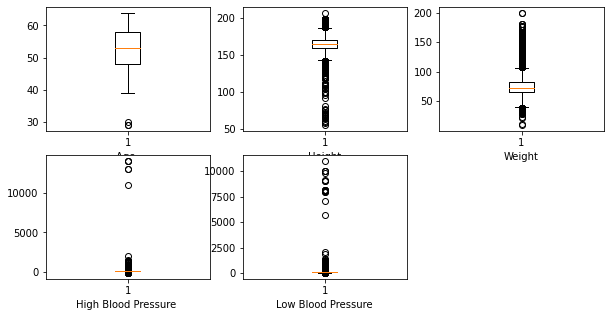

In [8]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.boxplot(df['Age'])
ax1.set_xlabel('Age ')
ax2.boxplot(df['Height'])
ax2.set_xlabel('Height')
ax3.boxplot(df['Weight'])
ax3.set_xlabel('Weight')
ax4.boxplot(df['High Blood Pressure'])
ax4.set_xlabel('High Blood Pressure ')
ax5.boxplot(df['Low Blood Pressure'])
ax5.set_xlabel('Low Blood Pressure')

In [0]:
def outliers_IQR(data, col):
    lower_quartile = data[col].quantile(0.25)
    upper_quartile = data[col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    return data[data[col].between((lower_quartile - outlier_thresh), (upper_quartile + outlier_thresh))]

df = outliers_IQR(df, 'Age')
df = outliers_IQR(df, 'Height')
df = outliers_IQR(df, 'Weight')
df = outliers_IQR(df, 'High Blood Pressure')
df = outliers_IQR(df, 'Low Blood Pressure')

Text(0.5, 0, 'Low Blood Pressure')

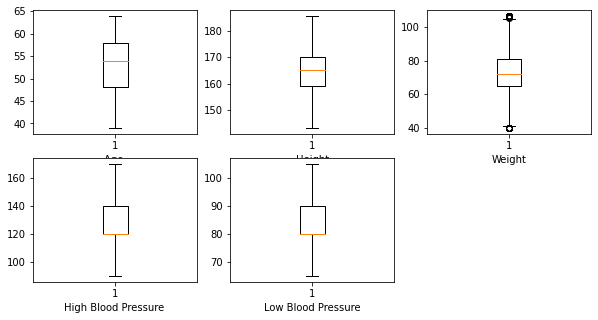

In [10]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.boxplot(df['Age'])
ax1.set_xlabel('Age ')
ax2.boxplot(df['Height'])
ax2.set_xlabel('Height')
ax3.boxplot(df['Weight'])
ax3.set_xlabel('Weight')
ax4.boxplot(df['High Blood Pressure'])
ax4.set_xlabel('High Blood Pressure ')
ax5.boxplot(df['Low Blood Pressure'])
ax5.set_xlabel('Low Blood Pressure')

### Clipping High Blood Pressure (125,170) and Low Blood Pressure Values(60,89). 

In [0]:
df['High Blood Pressure'].clip(125,170,inplace=True)
df['Low Blood Pressure'].clip(60,89,inplace = True)

### Univariate Analysis

In [94]:
print(df.Disease.value_counts())
countNoDisease = len(df[df.Disease == 0])
countHaveDisease = len(df[df.Disease == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.Disease))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.Disease))*100)))

1    21206
0    20804
Name: Disease, dtype: int64
Percentage of Patients Haven't Heart Disease: 49.52%
Percentage of Patients Have Heart Disease: 50.48%


**Analysis:** It tells us that our Dataset is Balanced DataSet.

### Bivaraiate Analysis


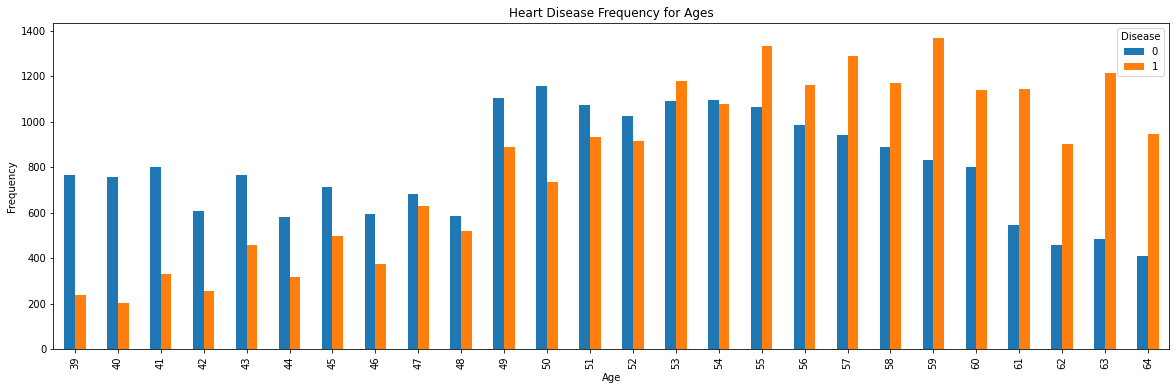

In [12]:
pd.crosstab(df.Age,df.Disease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Analysis: The above graph shows a pattern that as Age increases the chances of getting a Disease is High.

Percentage of Female Patients: 64.51%
Percentage of Male Patients: 35.49%


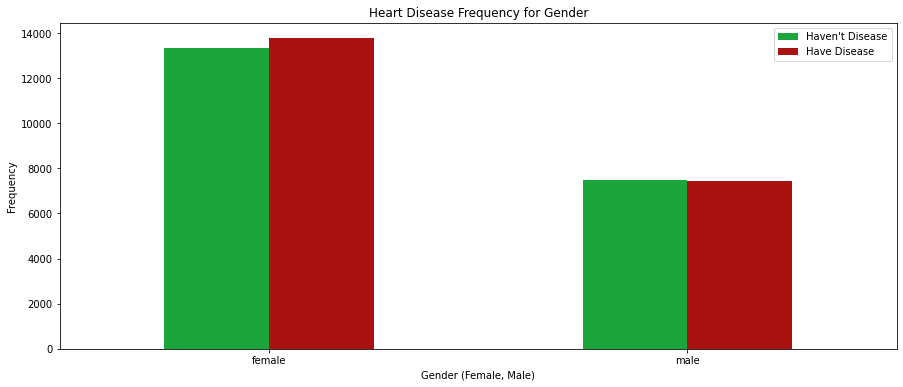

In [13]:
countFemale = len(df[df.Gender == 'female'])
countMale = len(df[df.Gender == 'male'])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Gender))*100)))
pd.crosstab(df.Gender,df.Disease).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Gender (Female, Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Analysis: Female Patients are twice as Male Patients

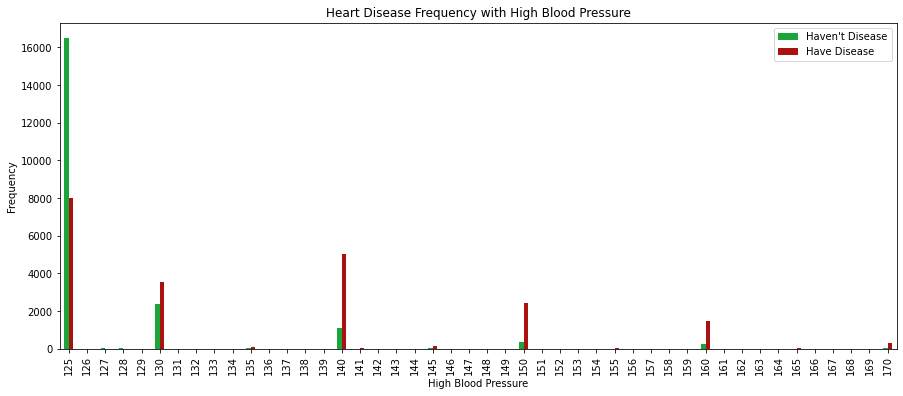

In [92]:
pd.crosstab(df['High Blood Pressure'],df.Disease).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency with High Blood Pressure')
plt.xlabel('High Blood Pressure')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Analysis:** As Blood Pressure goes beyond 125 the chances of getting the disease increases.

### Trivariate Analysis


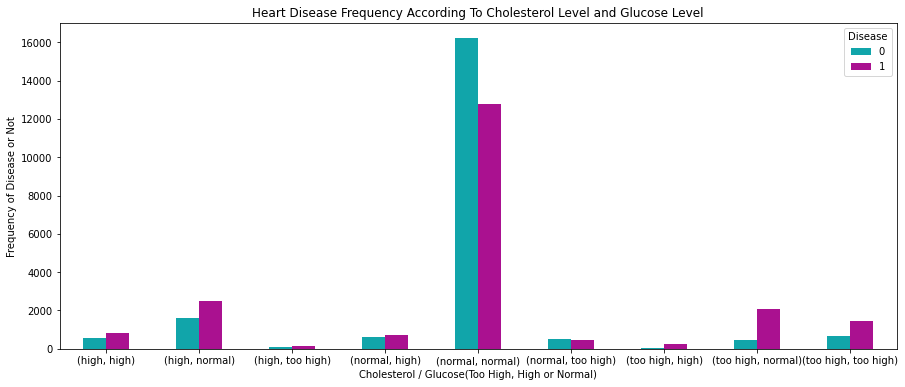

In [118]:
pd.crosstab([df.Cholesterol,df.Glucose],df.Disease).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Cholesterol Level and Glucose Level')
plt.xlabel('Cholesterol / Glucose(Too High, High or Normal)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

**Analysis:** We can see that when cholestrol is high/too high as compared to when glucose is normal there are more number of chances getting a disease. Although when both are high there is a definite chance of getting the disease.

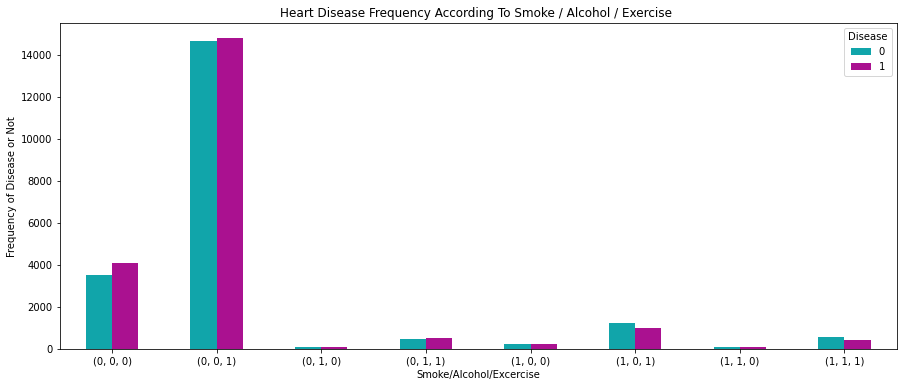

In [117]:
pd.crosstab([df.Smoke,df.Alcohol,df.Exercise],df.Disease).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Smoke / Alcohol / Exercise ')
plt.xlabel('Smoke/Alcohol/Excercise')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

**Analysis:** We can see an interesting characteristic that when people smoke and drink alcohol and don't do exercise they are at higher risk of getting disease.
 

### Performing One Hot Encoding 

In [0]:
a = pd.get_dummies(df['Gender'], prefix = "Gender_")
b = pd.get_dummies(df['Cholesterol'], prefix = "Cholesterol_")
c = pd.get_dummies(df['Glucose'], prefix = "Glucose_")

In [0]:
frames = [df, a, b, c]
df1 = pd.concat(frames, axis = 1)
df1 = df1.drop(columns = ['Gender', 'Cholesterol', 'Glucose'])

# Section 2: Build, tune and evaluate various machine learning algorithms

In [0]:
y = df1.Disease.values

In [0]:
x = df1.drop(['Disease'], axis = 1)
# Scaling data
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [0]:
ns_probs = [0 for _ in range(len(y_test.T))]

1. Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB
nb_G = GaussianNB()
nb_G = nb_G.fit(x_train.T, y_train.T)
prediction = nb_G.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,prediction))
print("\n Classification Report \n",classification_report(y_test.T, prediction))


 Confusion Matrix 
 [[4826 1383]
 [2713 3681]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.78      0.70      6209
           1       0.73      0.58      0.64      6394

    accuracy                           0.67     12603
   macro avg       0.68      0.68      0.67     12603
weighted avg       0.68      0.67      0.67     12603



2. KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn_best = KNeighborsClassifier(n_neighbors=26)  
knn_best = knn_best.fit(x_train.T, y_train.T)
prediction = knn_best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,prediction))
print("\n Classification Report \n",classification_report(y_test.T, prediction))


 Confusion Matrix 
 [[4797 1412]
 [2270 4124]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      6209
           1       0.74      0.64      0.69      6394

    accuracy                           0.71     12603
   macro avg       0.71      0.71      0.71     12603
weighted avg       0.71      0.71      0.71     12603



3. SVM Linear

In [101]:
from sklearn.svm import SVC
from sklearn.svm import SVC
svm_Best = SVC(C=0.1,kernel='linear',probability=True)
svm_Best = svm_Best.fit(x_train.T, y_train.T)
predictions = svm_Best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[5359  850]
 [2890 3504]]

 Classification report 
               precision    recall  f1-score   support

           0       0.65      0.86      0.74      6209
           1       0.80      0.55      0.65      6394

    accuracy                           0.70     12603
   macro avg       0.73      0.71      0.70     12603
weighted avg       0.73      0.70      0.70     12603



4. SVM Non Linear

In [104]:
svm_NL_Best = SVC(C=10,gamma=0.1,kernel='rbf',probability=True)
svm_NL_Best.fit(x_train.T, y_train.T)
predictions = svm_NL_Best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[5209 1000]
 [2627 3767]]

 Classification report 
               precision    recall  f1-score   support

           0       0.66      0.84      0.74      6209
           1       0.79      0.59      0.68      6394

    accuracy                           0.71     12603
   macro avg       0.73      0.71      0.71     12603
weighted avg       0.73      0.71      0.71     12603



5. Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf_best = RandomForestClassifier(bootstrap=True,max_depth=100,max_features=3,min_samples_leaf=5,min_samples_split=12,n_estimators=300)
rf_best.fit(x_train.T, y_train.T)
predictions = rf_best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification Report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[4733 1476]
 [2026 4368]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      6209
           1       0.75      0.68      0.71      6394

    accuracy                           0.72     12603
   macro avg       0.72      0.72      0.72     12603
weighted avg       0.72      0.72      0.72     12603



6. Gradient Boosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gb_best = GradientBoostingClassifier(n_estimators=150,max_depth=3,learning_rate=0.1)
gb_best = gb_best.fit(x_train.T, y_train.T)
predictions = gb_best.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification Report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[4737 1472]
 [1993 4401]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      6209
           1       0.75      0.69      0.72      6394

    accuracy                           0.73     12603
   macro avg       0.73      0.73      0.72     12603
weighted avg       0.73      0.73      0.72     12603



7. Logistic Regression

A. Base Model

In [98]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(x_train.T,y_train.T)
predictions = logmodel.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification Report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[4960 1249]
 [2283 4111]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.80      0.74      6209
           1       0.77      0.64      0.70      6394

    accuracy                           0.72     12603
   macro avg       0.73      0.72      0.72     12603
weighted avg       0.73      0.72      0.72     12603



B. HyperTuning Parameters to get Best parameters in an attempt to increase accuracy and recall.

In [97]:
param_grid = {'C': [0.1, 0.5, 1, 4, 10],
    'penalty': ['l1', 'l2'], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 
grid = GridSearchCV(LogisticRegression(),param_grid,n_jobs=3)
grid_lr = grid.fit(x_train.T,y_train.T)
grid_predictions = grid_lr.predict(x_test.T)
print("\n Best Parameters \n",grid_lr.best_params_)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,grid_predictions))
print("\n Classification Report \n",classification_report(y_test.T,grid_predictions))


 Best Parameters 
 {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

 Confusion Matrix 
 [[4971 1238]
 [2282 4112]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      6209
           1       0.77      0.64      0.70      6394

    accuracy                           0.72     12603
   macro avg       0.73      0.72      0.72     12603
weighted avg       0.73      0.72      0.72     12603



C. Comparing Base model and Best Model

In [102]:
tune1 = pd.DataFrame(data=None, index= ['LR','LR_Best'],columns=['Accuracy','Precision','Recall','F1_Score','Hyper_Parameters'])
tune1['Accuracy']=  [0.72,0.72]
tune1['Precision']= [0.73,0.73]
tune1['Recall']=    [0.72,0.72]
tune1['F1_Score']=  [0.72,0.72]
tune1['Hyper_Parameters']= [['C: 1.0', 'penalty: l2', 'solver: lbfgs'],['C: 0.1', 'penalty: l1', 'solver: liblinear']]
tune1

,Accuracy,Precision,Recall,F1_Score,Hyper_Parameters
LR,0.72,0.73,0.72,0.72,"[C: 1.0, penalty: l2, solver: lbfgs]"
LR_Best,0.72,0.73,0.72,0.72,"[C: 0.1, penalty: l1, solver: liblinear]"


**Analysis:**<br>
*Penalty :* Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.<br>
*C:* Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.<br>
*Solver :* Algorithm to use in the optimization problem.
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones. For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty.‘liblinear’ and ‘saga’ also handle L1 penalty.‘saga’ also supports ‘elasticnet’ penalty
‘liblinear’ does not support setting penalty='none'<br>
*Regularization:* Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. In simple terms, it reduces parameters and shrinks (simplifies) the model. This more streamlined, more parsimonious model will likely perform better at predictions. Regularization adds penalties to more complex models and then sorts potential models from least overfit to greatest; The model with the lowest “overfitting” score is usually the best choice for predictive power.
L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients. In other words, it limits the size of the coefficients.
L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients.<br>
As we can observe from the table our model performance remains constant after tuning the hyper parameters. The model has constant accuracy and recall which is 72% but best model shows an increase in True Positive. 




D. Plotting Roc Curve using Best Model

No Disease: ROC AUC=0.500
Disease: ROC AUC=0.785


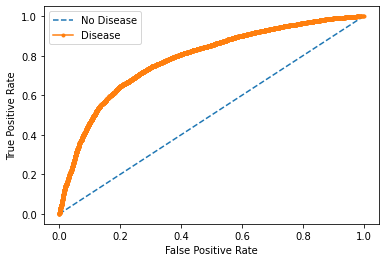

In [52]:
lr_probs = grid_lr.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

8. ANN 0 Layer

In [0]:
# creating functions for calculating recall, f1 score and precision
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

A. Base Model 

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(1,activation='sigmoid',input_shape=(16,)))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m])
model.fit(x_train.T, y_train.T, epochs=5, batch_size=128,verbose = False)
loss, accuracy, f1_score, precision, recall= model.evaluate(x_test.T, y_test.T, batch_size=128)
loss, accuracy, f1_score, precision, recall

B. HyperTuning Parameters to get Best parameters in an attempt to increase accuracy and recall.

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
def build_ann(optimizer):
  model = Sequential()
  model.add(Dense(1,activation='sigmoid',input_shape=(16,)))
  model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m])
  return model
model=KerasClassifier(build_fn=build_ann)
parameters={'batch_size':[25,32],
           'epochs':[10,50],
           'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator= model,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10)
grid_search=grid_search.fit(x_train.T, y_train.T,verbose=False)
grid_search.best_score_

In [0]:
grid_predictions_ann = grid_search.predict(x_test.T)
print("\n Classification Report \n",classification_report(y_test.T,grid_predictions_ann))

In [0]:
best_parameters=grid_search.best_params_
best_parameters

C. Comparing Training Accuracy with Validation Accuracy

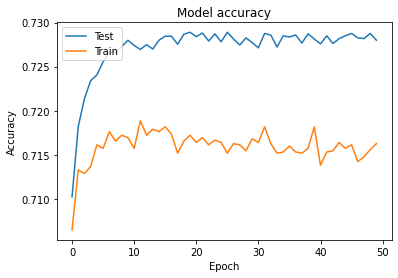

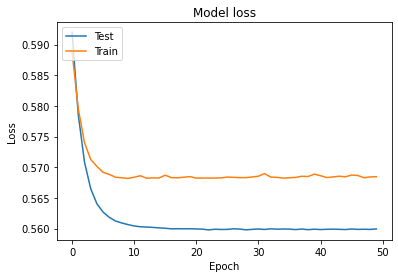

In [64]:
history = model.fit(x_train.T, y_train.T, validation_split=0.25, epochs=50, batch_size=25,verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

**Analysis:** As Training and Validation Accuracy are similar this model is better and also Training Loss and Validation Loss are reducing it means that the data is not overfitting.

D. Comparing ANN0 Base Model with ANN0 Best Model

In [152]:
#import plotly.express as px
import plotly.offline as px
import plotly.graph_objects as go
tune2 = pd.DataFrame(data=None,columns=['Model','Accuracy','Precision','Recall','F1_Score','Hyper_Parameters'])
tune2['Model']=  ['ANN0','ANN0_Best']
tune2['Accuracy']=  [0.69,0.72]
tune2['Precision']=  [0.73,0.73]
tune2['Recall']=  [0.63,0.72]
tune2['F1_Score']=  [0.67,0.72]
tune2['Hyper_Parameters']= [['batch_size:128',
           'epochs:5',
           'optimizer: rmsprop'],['batch_size:25',
           'epochs:50',
           'optimizer:rmsprop']]
tune2
#fig = go.Figure(data=[go.Table(
  #  columnorder = [1,2,3,4,5,6],
   # columnwidth = [100,80,80,80,80,400],
   # header=dict(values=list(tune2.columns),
              #  fill_color='paleturquoise',
            #    align='left'),
   # cells=dict(values=[tune2.Model,tune2.Accuracy,tune2.Precision,tune2.Recall,tune2.F1_Score,tune2.Hyper_Parameters],
         #      fill_color='lavender',
        #       align='left'))
#])

#fig.show()
# commenting the code as it was plotly figure were not showing up in Html

,Model,Accuracy,Precision,Recall,F1_Score,Hyper_Parameters
0,ANN0,0.69,0.73,0.63,0.67,"[batch_size:128, epochs:5, optimizer: rmsprop]"
1,ANN0_Best,0.72,0.73,0.72,0.72,"[batch_size:25, epochs:50, optimizer:rmsprop]"


**Analysis:** After Hypertuning ANN with zero hidden layer there is a significan rise in Accuracy and Recall. The Best model has Accuracy of 72% and recall as 72%. The hyper Parameter tuned are Epoch, Batch size and Optimizer.<br>
*Epoch :* One Epoch is when an entire dataset is passed forward and backward through the neural network only once.One epoch leads to underfitting and as the number of epochs increases, more number of times the weight are changed in the neural network and the curve goes from underfitting to optimal to overfitting curve.<br>
*Batch Size :* Total number of training examples present in a single batch.<br>
*Optimizers :* Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.<br>
*RMSprop Optimizer :* RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster.<br>
*Adam Optimizer:* Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems<br>
Keras’s binary_crossentropy, when fed with input resulting from sigmoid activation, will not produce over- or underflow of numbers.
Therefore as observed above reducing batch size and increasing epoch increases the accuracy and recall for ANN with zero hidden layers.

E. Generating Roc Curve for Ann0 Best Model

No Disease: ROC AUC=0.500
Disease: ROC AUC=0.788


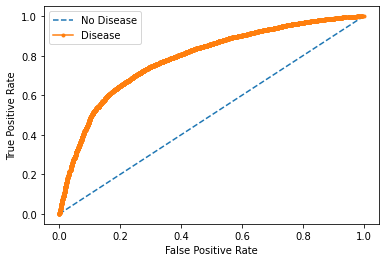

In [89]:
lr_probs = grid_search.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

9. ANN 1 Layer

A. Base Model

In [0]:
model1 = Sequential()
model1.add(Dense(units=4, activation='relu',input_shape=(16,)))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m])
model1.fit(x_train.T, y_train.T, epochs=5, batch_size=128,verbose = False)
loss, accuracy, f1_score, precision, recall= model1.evaluate(x_test.T, y_test.T, batch_size=128)
loss, accuracy, f1_score, precision, recall

B. HyperTuning Parameters to get Best parameters in an attempt to increase accuracy and recall.

In [0]:
def build_ann(optimizer):
  model1 = Sequential()
  model1.add(Dense(units=4, activation='relu',input_shape=(16,)))
  model1.add(Dense(1,activation='sigmoid'))
  model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model1
model1=KerasClassifier(build_fn=build_ann)
parameters={'batch_size':[25,32],
           'epochs':[10,50],
           'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator= model1,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10)
grid_search_1=grid_search.fit(x_train.T, y_train.T,verbose=False)
grid_search_1.best_score_

In [0]:
grid_predictions_ann1 = grid_search_1.predict(x_test.T)
print("\n Classification Report \n",classification_report(y_test.T,grid_predictions_ann1))

In [0]:
best_parameters1=grid_search_1.best_params_
best_parameters1

C. Comparing Training Accuracy with Validation Accuracy

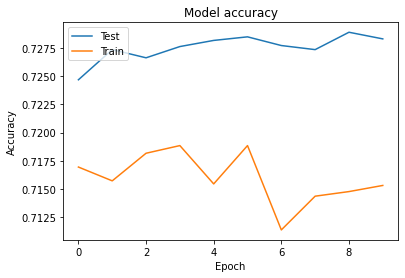

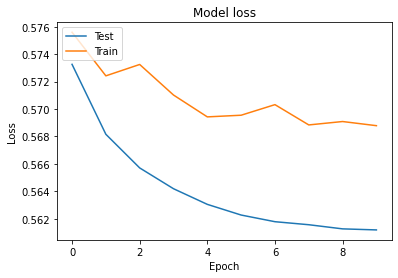

In [73]:
history = model1.fit(x_train.T, y_train.T, validation_split=0.25, epochs=10, batch_size=32,verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

Analysis: As Training and Validation Accuracy are similar this model is better and also Training Loss and Validation Loss are reducing it means that the data is not overfitting.

D. Comparing ANN1 Base Model with ANN1 Best Model

In [153]:
tune3 = pd.DataFrame(data=None,columns=['Model','Accuracy','Precision','Recall','F1_Score','Hyper_Parameters'])
tune3['Model']=  ['ANN1','ANN1_Best']
tune3['Accuracy']=  [0.71,0.72]
tune3['Precision']=  [0.77,0.72]
tune3['Recall']=  [0.62,0.72]
tune3['F1_Score']=  [0.68,0.72]
tune3['Hyper_Parameters']= [['batch_size:128',
           'epochs:5',
           'optimizer: rmsprop'],['batch_size:32',
           'epochs:10',
           'optimizer:adam']]
tune3 
#fig = go.Figure(data=[go.Table(
 #   columnorder = [1,2,3,4,5,6],
  #  columnwidth = [100,80,80,80,80,400],
   # header=dict(values=list(tune3.columns),
    #            fill_color='paleturquoise',
     #           align='left'),
    #cells=dict(values=[tune3.Model,tune3.Accuracy,tune3.Precision,tune3.Recall,tune3.F1_Score,tune3.Hyper_Parameters],
     #          fill_color='lavender',
      #         align='left'))
#])

#fig.show()

,Model,Accuracy,Precision,Recall,F1_Score,Hyper_Parameters
0,ANN1,0.71,0.77,0.62,0.68,"[batch_size:128, epochs:5, optimizer: rmsprop]"
1,ANN1_Best,0.72,0.72,0.72,0.72,"[batch_size:32, epochs:10, optimizer:adam]"


*Analysis:* After Hypertuning ANN with one hidden layer there is a slight rise in Accuracy and significant rise in Recall from base model. The Best model has Accuracy of 72% and recall as 72% but the otimizer used in best model is adam.
Here we have added one hidden layer with activation function as relu.<br>
*Activation function:* It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc


E. Generating Roc Curve for Ann1 Best Model

No Disease: ROC AUC=0.500
Disease: ROC AUC=0.789


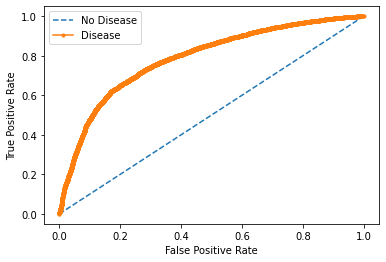

In [88]:
lr_probs = grid_search_1.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

10. ANN 2 Layer

A. Base Model

In [0]:
model2 = Sequential()
model2.add(Dense(units=4, activation='relu',input_shape=(16,)))
model2.add(Dense(units=4, activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m])
model2.fit(x_train.T, y_train.T, epochs=5, batch_size=128,verbose = False)
loss, accuracy, f1_score, precision, recall= model2.evaluate(x_test.T, y_test.T, batch_size=128)
loss, accuracy, f1_score, precision, recall

B. HyperTuning Parameters to get Best parameters in an attempt to increase accuracy and recall.

In [0]:
def build_ann(optimizer):
  model2 = Sequential()
  model2.add(Dense(units=4, activation='relu',input_shape=(16,)))
  model2.add(Dense(units=4, activation='relu'))
  model2.add(Dense(1,activation='sigmoid'))
  model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model2
model2=KerasClassifier(build_fn=build_ann)
parameters={'batch_size':[25,32],
           'epochs':[10,50],
           'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator= model2,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10)
grid_search_2=grid_search.fit(x_train.T, y_train.T,verbose=False)
grid_search_2.best_score_

In [0]:
grid_predictions_ann2 = grid_search_2.predict(x_test.T)
print("\n Classification Report \n",classification_report(y_test.T,grid_predictions_ann2))

In [0]:
best_parameters2=grid_search_2.best_params_
best_parameters2

C. Comparing Training Accuracy with Validation Accuracy

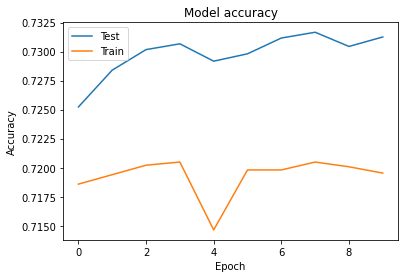

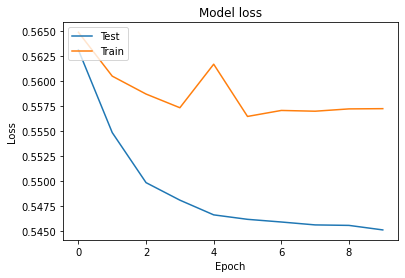

In [84]:
history = model2.fit(x_train.T, y_train.T, validation_split=0.25, epochs=10, batch_size=25,verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

Analysis: As Training and Validation Accuracy are similar this model is better and also Training Loss and Validation Loss are reducing it means that the data is not overfitting.

D. Comparing ANN2 Base Model with ANN2 Best Model

In [154]:
tune4 = pd.DataFrame(data=None,columns=['Model','Accuracy','Precision','Recall','F1_Score','Hyper_Parameters'])
tune4['Model']=  ['ANN2','ANN2_Best']
tune4['Accuracy']=  [0.71,0.72]
tune4['Precision']=  [0.73,0.73]
tune4['Recall']=  [0.69,0.72]
tune4['F1_Score']=  [0.71,0.72]
tune4['Hyper_Parameters']= [['batch_size:128',
           'epochs:5',
           'optimizer: rmsprop'],['batch_size:25',
           'epochs:10',
           'optimizer:rmsprop']]
tune4
#fig = go.Figure(data=[go.Table(
  #  columnorder = [1,2,3,4,5,6],
  #  columnwidth = [100,80,80,80,80,400],
   # header=dict(values=list(tune4.columns),
  #              fill_color='paleturquoise',
   #             align='left'),
  #  cells=dict(values=[tune4.Model,tune4.Accuracy,tune4.Precision,tune4.Recall,tune4.F1_Score,tune4.Hyper_Parameters],
             #  fill_color='lavender',
             #  align='left'))
#])

#fig.show()

,Model,Accuracy,Precision,Recall,F1_Score,Hyper_Parameters
0,ANN2,0.71,0.73,0.69,0.71,"[batch_size:128, epochs:5, optimizer: rmsprop]"
1,ANN2_Best,0.72,0.73,0.72,0.72,"[batch_size:25, epochs:10, optimizer:rmsprop]"


**Analysis:** After Hypertuning ANN with two hidden layer there is a slight rise in Accuracy and significant rise in Recall from base model. The Best model has Accuracy of 72% and recall as 72% after reducing batch size and increasing epoch. Here we have added two hidden layer with activation function as relu.

E. Generating Roc Curve for Ann2 Best Model

No Disease: ROC AUC=0.500
Disease: ROC AUC=0.788


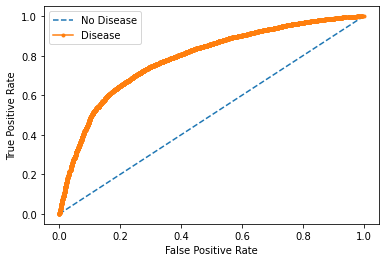

In [87]:
lr_probs = grid_search_2.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Comparing ANN with 0 Hidden layer, Ann with 1 Hidden Layer and Ann with 2 Hidden Layer

In [156]:
tune4 = pd.DataFrame(data=None,columns=['Model','Accuracy','Precision','Recall','F1_Score','AUC_Score','Hyper_Parameters'])
tune4['Model']=  ['ANN0_Best','ANN1_Best','ANN2_Best']
tune4['Accuracy']=  [0.72,0.72,0.72]
tune4['Precision']=  [0.73,0.72,0.73]
tune4['Recall']=  [0.72,0.72,0.72]
tune4['F1_Score']=  [0.72,0.72,0.72]
tune4['AUC_Score']=  [0.788,0.789,0.788]
tune4['Hyper_Parameters']= [['batch_size:25','epochs:50','optimizer:rmsprop'],
                            ['batch_size:32','epochs:10', 'optimizer:adam'],
                            ['batch_size:25','epochs:10','optimizer:rmsprop']]
tune4
#fig = go.Figure(data=[go.Table(
 #   columnorder = [1,2,3,4,5,6,7],
  #  columnwidth = [100,80,80,80,80,90,400],
   # header=dict(values=list(tune4.columns),
   #             fill_color='paleturquoise',
    #            align='left'),
    #cells=dict(values=[tune4.Model,tune4.Accuracy,tune4.Precision,tune4.Recall,tune4.F1_Score,tune4.AUC_Score,tune4.Hyper_Parameters],
     #          fill_color='lavender',
     #          align='left'))
#])

#fig.show()

,Model,Accuracy,Precision,Recall,F1_Score,AUC_Score,Hyper_Parameters
0,ANN0_Best,0.72,0.73,0.72,0.72,0.788,"[batch_size:25, epochs:50, optimizer:rmsprop]"
1,ANN1_Best,0.72,0.72,0.72,0.72,0.789,"[batch_size:32, epochs:10, optimizer:adam]"
2,ANN2_Best,0.72,0.73,0.72,0.72,0.788,"[batch_size:25, epochs:10, optimizer:rmsprop]"


Analysis: After Looking at above table all the three models have similar accuracy and recall. But if you look at the hyper parameters each model is best fitted at diiferent hyper parameters. One thing which i observed is as i added layers the loss was significantly reduced.

### Comparing ANN0, Logistic Regression and SVM

In [100]:
hyper7 = pd.DataFrame(data=None, index= ['ANN0','LR','SVM',],columns=['Accuracy','Precision','Recall','F1_Score','AUC_Score'])

hyper7['Accuracy']=  [0.72,0.72,0.70]
hyper7['Precision']= [0.73,0.73,0.73]
hyper7['Recall']=    [0.72,0.72,0.72]
hyper7['F1_Score']=  [0.72,0.72,0.71]
hyper7['AUC_Score']= [0.788,0.785,0.794]
hyper7

,Accuracy,Precision,Recall,F1_Score,AUC_Score
ANN0,0.73,0.73,0.72,0.72,0.760
LR,0.72,0.73,0.72,0.72,0.787
SVM,0.70,0.73,0.71,0.71,0.794


**Analysis:**
The above 3 models are similar in nature because a netwrok without a hidden layer is actually identical to logistic regression model if the logistical sigmoidal activation function is used and Without using the kernel trick in SVM, the hyperplanes are strictly linear which are roughly equivalent to feed forward neural networks without an activation function. Therefore they are similar but process of generating the decision boundary is different.
The above table shows similarity in accuracy and recall for the above three models.

#Section 3

11. Decision Tree

A. Base Model

In [116]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train.T,y_train.T)
predictions = dtree.predict(x_test.T)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,predictions))
print("\n Classification Report \n",classification_report(y_test.T,predictions))


 Confusion Matrix 
 [[3801 2408]
 [2441 3953]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      6209
           1       0.62      0.62      0.62      6394

    accuracy                           0.62     12603
   macro avg       0.62      0.62      0.62     12603
weighted avg       0.62      0.62      0.62     12603



B. HyperTuning Parameters to get Best parameters in an attempt to increase accuracy and recall.

In [117]:
param_grid = {'max_depth': [1, 10],
    'min_samples_split': [0.1,0.5,1], 
    'min_samples_leaf': [0.1,0.3,0.5]} 
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=3)
grid_dt = grid.fit(x_train.T,y_train.T)
grid_predictions = grid_dt.predict(x_test.T)
print("\n Best Parameters \n",grid_dt.best_params_)
print("\n Confusion Matrix \n",confusion_matrix(y_test.T,grid_predictions))
print("\n Classification Report \n",classification_report(y_test.T,grid_predictions))


 Best Parameters 
 {'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

 Confusion Matrix 
 [[4947 1262]
 [2417 3977]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73      6209
           1       0.76      0.62      0.68      6394

    accuracy                           0.71     12603
   macro avg       0.72      0.71      0.71     12603
weighted avg       0.72      0.71      0.71     12603



C. Comparing Base Model and Best Model

In [157]:
tune2 = pd.DataFrame(data=None,columns=['Model','Accuracy','Precision','Recall','F1_Score','Hyper_Parameters'])
tune2['Model']=  ['DT','DT_Best']
tune2['Accuracy']=  [0.62,0.71]
tune2['Precision']=  [0.62,0.72]
tune2['Recall']=  [0.62,0.71]
tune2['F1_Score']=  [0.62,0.71]
tune2['Hyper_Parameters']= [['max_depth: None', 'min_samples_leaf: 1', 'min_samples_split: 2'],['max_depth: 1', 'min_samples_leaf: 0.1', 'min_samples_split: 0.1']]
tune2
#fig = go.Figure(data=[go.Table(
 #   columnorder = [1,2,3,4,5,6],
 #   columnwidth = [60,80,80,80,80,400],
  #  header=dict(values=list(tune2.columns),
  #              fill_color='paleturquoise',
   #             align='left'),
  #  cells=dict(values=[tune2.Model,tune2.Accuracy,tune2.Precision,tune2.Recall,tune2.F1_Score,tune2.Hyper_Parameters],
  #             fill_color='lavender',
   #            align='left'))
#])

#fig.show()

,Model,Accuracy,Precision,Recall,F1_Score,Hyper_Parameters
0,DT,0.62,0.62,0.62,0.62,"[max_depth: None, min_samples_leaf: 1, min_sam..."
1,DT_Best,0.71,0.72,0.71,0.71,"[max_depth: 1, min_samples_leaf: 0.1, min_samp..."


**Analysis:** The hyper parameters tuned are:<br>
*max_depth:* This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We have observed that model overfits for large depth values.<br> 
*min_samples_split:* When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. when we consider 100% of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.<br>
*min_samples_leaf:* This describe the minimum number of samples of samples at the leafs, the base of the tree. Increasing this value may cause underfitting.<br>
As Observed in the above table we observe significant rise in accuracy and recall which is from 61% to 71% by increasing depth and reducing samples at each node and samples at leaf.

D. Generating ROC curve for best model

No Disease: ROC AUC=0.500
Disease: ROC AUC=0.709


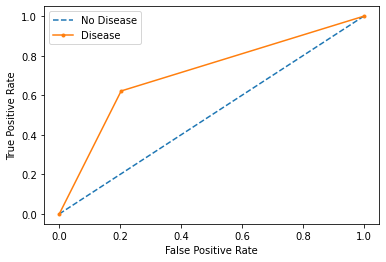

In [118]:
lr_probs = grid_dt.predict_proba(x_test.T)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test.T, ns_probs)
lr_auc = roc_auc_score(y_test.T, lr_probs)
# summarize scores
print('No Disease: ROC AUC=%.3f' % (ns_auc))
print('Disease: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.T, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.T, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Disease')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Disease')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Comparing Random Forest , Gradient Boosting, Logistic Regression and Decision Tree with respect to performance and feature importance

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
sel = SelectFromModel(RandomForestClassifier(bootstrap= True, max_depth= 100, max_features= 2, min_samples_leaf= 5, min_samples_split= 12, n_estimators= 300))
sel.fit(x_train.T, y_train.T)
selected_feat= x_train.T.columns[(sel.get_support())]
print(selected_feat)

In [0]:
sel1 = SelectFromModel(DecisionTreeClassifier(max_depth= 10, min_samples_leaf=0.1, min_samples_split= 0.1))
sel1.fit(x_train.T, y_train.T)
selected_feat1= x_train.T.columns[(sel1.get_support())]
print(selected_feat1)

In [0]:
sel2 = SelectFromModel(GradientBoostingClassifier(n_estimators=150,max_depth=3,learning_rate=0.1))
sel2.fit(x_train.T, y_train.T)
selected_feat2= x_train.T.columns[(sel2.get_support())]
print(selected_feat2)

In [0]:
sel3 = SelectFromModel(LogisticRegression(C = 0.1, penalty = 'l1',solver='liblinear'))
sel3.fit(x_train.T, y_train.T)
selected_feat3= x_train.T.columns[(sel3.get_support())]
print(selected_feat3)

Table Of Feature Importance

In [128]:
import plotly.express as px
import plotly.graph_objects as go
hyper1 = pd.DataFrame(data=None,columns=['RF'])
hyper1['RF']= selected_feat
hyper2 = pd.DataFrame(data=None,columns=['GBC'])
hyper2['GBC']= selected_feat2
hyper3 = pd.DataFrame(data=None,columns=['DT'])
hyper3['DT']= selected_feat1
hyper4 = pd.DataFrame(data=None,columns=['LR'])
hyper4['LR']= selected_feat3
horizontal_stack = pd.concat([hyper4, hyper1,hyper2,hyper3], axis=1)
horizontal_stack.head()

,LR,RF,GBC,DT
0,Age,Age,Age,Age
1,Height,Height,High Blood Pressure,High Blood Pressure
2,Weight,Weight,NaN,NaN
3,High Blood Pressure,High Blood Pressure,NaN,NaN
4,Low Blood Pressure,Low Blood Pressure,NaN,NaN


Table Comparing Performance among all 4 algorithms

In [130]:
hyper6 = pd.DataFrame(data=None, index= ['GBC','LR','RF','DT'],columns=['Accuracy','Precision','Recall','F1_Score','AUC_Score'])
hyper6['Accuracy']=  [0.73,0.72,0.72,0.71]
hyper6['Precision']= [0.73,0.73,0.72,0.72]
hyper6['Recall']=    [0.73,0.72,0.72,0.71]
hyper6['F1_Score']=  [0.72,0.72,0.72,0.71]
hyper6['AUC_Score']= [0.800,0.785,0.797,0.709]
hyper6

,Accuracy,Precision,Recall,F1_Score,AUC_Score
GBC,0.73,0.73,0.73,0.72,0.800
LR,0.72,0.73,0.72,0.72,0.785
RF,0.72,0.72,0.72,0.72,0.797
DT,0.71,0.72,0.71,0.71,0.709


**Analysis:** From the above two table we can observe that Decision Tree is consistent with the findings from the other three algorithms. The two important feature observed in all the four algorithm are Age and High Blood Pressure but High Blood Pressure has low weight in Logistic and Random Forest as for them the second most important feature is Height. Decision Tree also provides similar peroformance coefficients with respect to other three algorithms. All the four algorithms are having accuracies and recall between 71% to 73% in which Gradient boosting proves to be the best model with accuracy as 73% and recall as 72% 


# Comparing All Supervised Algorithms

In [159]:
import plotly.express as px
import plotly.graph_objects as go
hyper5 = pd.DataFrame(data=None,columns=['Algorithms','Accuracy','Precision','Recall','F1_Score','AUC_Score','Hyper_Parameters','Time_Approx'])
hyper5['Algorithms']=['GBC','LR','RF','Non_linear_SVM','DT','KNN','SVM','NBC']
hyper5['Accuracy']=  [0.73,0.72,0.72,0.71,0.71,0.71,0.70,0.67]
hyper5['Precision']= [0.73,0.73,0.72,0.73,0.72,0.71,0.73,0.68]
hyper5['Recall']=    [0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.68]
hyper5['F1_Score']=  [0.72,0.72,0.72,0.71,0.71,0.71,0.71,0.67]
hyper5['AUC_Score']= [0.800,0.785,0.797,0.794,0.709,0.787,0.794,0.760]
hyper5['Hyper_Parameters']= [['learning rate','max_depth','n_estimator'],['C','penalty','solver'],['max_depth','n_estimator','bootstrap', 'max_features','min_samples_leaf', 'min_samples_split'],['C','gamma','kernel=rbf'],['max_depth', 'min_samples_leaf', 'min_samples_split'],'k','C',['GuassianNB','BernoulliNB','Multinomial']]
hyper5['Time_Approx']= ['2-3 hours','5 minutes','2-3 hours','2-3 hours','20 minutes','25 minutes','1-2 hours','5 minutes']
hyper5
#fig = go.Figure(data=[go.Table(
#    columnorder = [1,2,3,4,5,6,7,8],
 #   columnwidth = [80,80,80,80,80,90,300,80],
 #   header=dict(values=list(hyper5.columns),
  #              fill_color='paleturquoise',
  #              align='left'),
  #  cells=dict(values=[hyper5.Algorithms,hyper5.Accuracy,hyper5.Precision,hyper5.Recall,hyper5.F1_Score,hyper5.AUC_Score,hyper5.Hyper_Parameters,hyper5.Time_Approx],
   #            fill_color='lavender',
    #           align='left'))
#])

#fig.show()

,Algorithms,Accuracy,Precision,Recall,F1_Score,AUC_Score,Hyper_Parameters,Time_Approx
0,GBC,0.73,0.73,0.73,0.72,0.800,"[learning rate, max_depth, n_estimator]",2-3 hours
1,LR,0.72,0.73,0.72,0.72,0.785,"[C, penalty, solver]",5 minutes
2,RF,0.72,0.72,0.72,0.72,0.797,"[max_depth, n_estimator, bootstrap, max_featur...",2-3 hours
3,Non_linear_SVM,0.71,0.73,0.71,0.71,0.794,"[C, gamma, kernel=rbf]",2-3 hours
4,DT,0.71,0.72,0.71,0.71,0.709,"[max_depth, min_samples_leaf, min_samples_split]",20 minutes
5,KNN,0.71,0.71,0.71,0.71,0.787,k,25 minutes
6,SVM,0.70,0.73,0.71,0.71,0.794,C,1-2 hours
7,NBC,0.67,0.68,0.68,0.67,0.760,"[GuassianNB, BernoulliNB, Multinomial]",5 minutes


**Analyis:**<br>
I have considered Accuracy and Recall as Performance metric because our dataset is balanced dataset and as its the disease problem my aim was to predict total number of patients to have disease and i hypertune the model with an aim to reduce type1 error.<br>
As Observing above all the supervised algorithms have similar accuracies and recall but Gradient boosting proofs to be the best model with accuracy of 73% and recall as 73%. 

#Section 4 : TEST DATA SET

In [0]:
df_test = pd.read_csv('Disease Prediction Testing.csv')
df_test.set_index('ID',inplace = True)
df_test = df.drop_duplicates()
df_test= outliers_IQR(df_test, 'Age')
df_test = outliers_IQR(df_test, 'Height')
df_test = outliers_IQR(df_test, 'Weight')
df_test= outliers_IQR(df_test, 'High Blood Pressure')
df_test = outliers_IQR(df_test, 'Low Blood Pressure')
df_test['High Blood Pressure'].clip(125,170,inplace=True)
df_test['Low Blood Pressure'].clip(60,89,inplace = True)
a = pd.get_dummies(df_test['Gender'], prefix = "Gender_")
b = pd.get_dummies(df_test['Cholesterol'], prefix = "Cholesterol_")
c = pd.get_dummies(df_test['Glucose'], prefix = "Glucose_")
frames = [df_test, a, b, c]
df_test = pd.concat(frames, axis = 1)
df_test = df_test.drop(columns = ['Gender', 'Cholesterol', 'Glucose','Disease'])

In [0]:
norm_x = (df_test - np.min(df_test)) / (np.max(df_test) - np.min(df_test)).values

In [0]:
p_lr = grid_lr.predict(norm_x)
p_dt = grid_dt.predict(norm_x)
p_a0 = grid_search.predict(norm_x)
p_a1 = grid_search_1.predict(norm_x)
p_a2 = grid_search_2.predict(norm_x)

In [0]:
final_df = pd.DataFrame(data=None,columns=['LR','DT','ANN0','ANN1','ANN2'])
final_df['LR']=p_lr
final_df['DT']=p_dt
final_df['ANN0']=p_a0 
final_df['ANN1']=p_a1
final_df['ANN2']=p_a2

In [0]:
final_df = final_df.reset_index()

In [146]:
final_df.rename(columns = {'index':'ID'}, inplace = True)
final_df.head(10)

,ID,LR,DT,ANN0,ANN1,ANN2
0,0,0,1,1,1,1
1,1,1,1,1,1,1
2,2,0,0,0,0,0
3,3,0,0,0,0,0
4,4,0,0,0,0,0
5,5,1,1,1,1,1
6,6,0,0,0,0,0
7,7,1,1,1,1,1
8,8,1,1,1,1,1
9,9,1,1,1,1,1


In [0]:
final_df.to_csv('Akshay_Bhala_HW4.csv',index=False)

Conclusion: Learned about applying two different classification algorithms and to build ANN models and how they are used to predict the unspecified disease. Learned how each parameter affects the performance of the model. How tuning hyperparameter tells us about underfitting and overfitting of data. Plotting Roc curve explains about the performance of the model. The finidings from the above steps tells us that Gradient Boosting is the best model for this data set to predict whether the person has disease or not.